In [1]:
import sys
sys.path.append(r'C:\Users\chaud\OneDrive\Documents\MACHINE LEARNING\utils')

In [2]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import Callback
import seaborn as sns
from save_data import save_data
from load_data import load_data
from disp_loss import disp_loss, disp_rel_loss
from tuner import Tuner

In [3]:
dataset = pd.read_excel('https://firebasestorage.googleapis.com/v0/b/common-e8332.appspot.com/o/Merged_dataset_v12.xlsx?alt=media&token=15430bd7-a35f-45fe-9752-753054d89402')
dataset = dataset[['M','N','P','Q','theta0', 'PSLR', 'HPBW','SLA', 'delta']]
# Data preprocessing
X_df = dataset[['M','N','P','Q','theta0', 'PSLR']]
#X = dataset[['theta0', 'PSLR']].values
y_df = dataset[['HPBW','SLA', 'delta']]

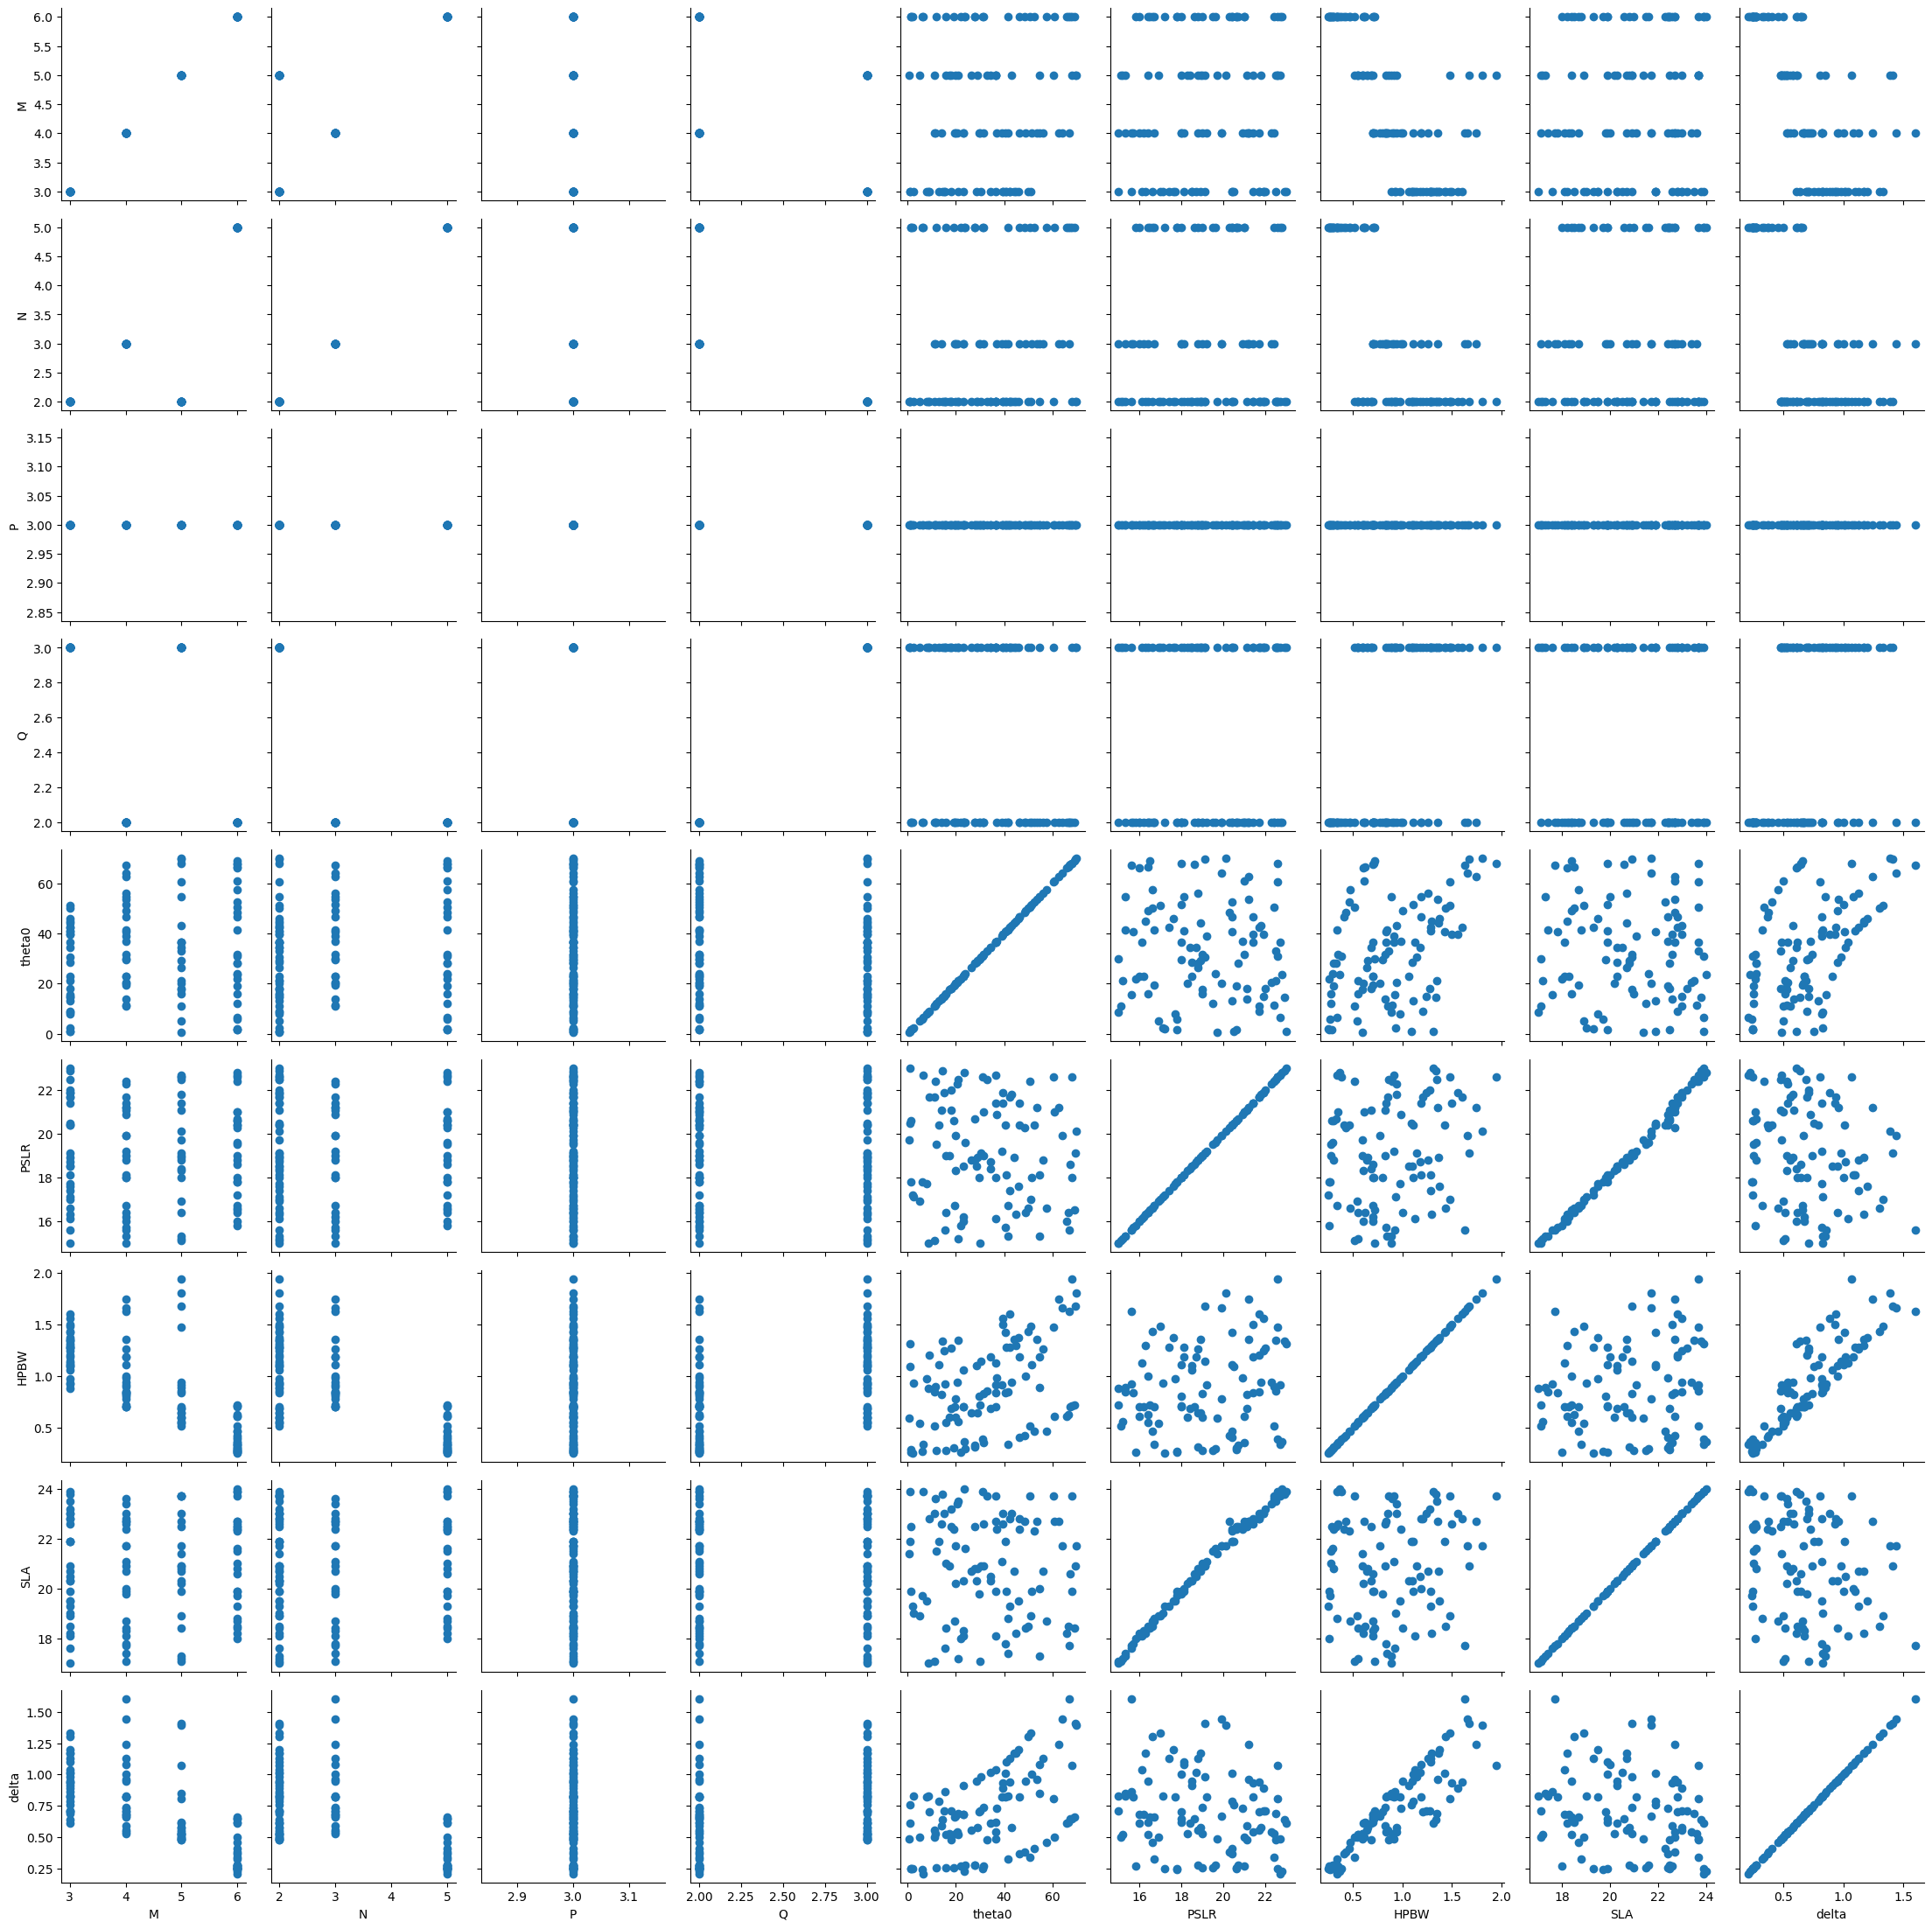

In [4]:
rand_df = dataset.sample(n=100, random_state=42)
grid = sns.PairGrid(data=rand_df)
grid.map(plt.scatter)
plt.show()

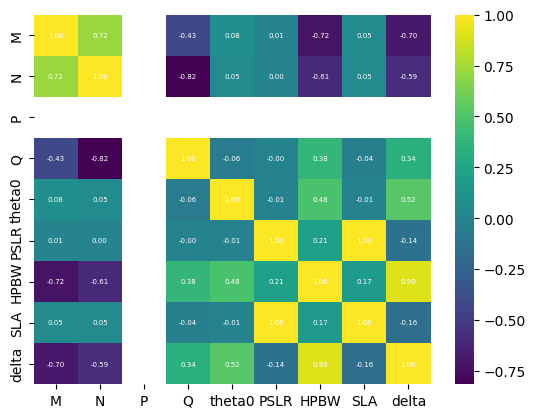

In [5]:
sns.heatmap(dataset.corr(), cmap='viridis', annot=True, fmt=".2f", annot_kws={"size": 5, "color": "white"})
plt.show()

In [4]:
X_main_df, X_test_df, y_main_df, y_test_df = train_test_split(X_df, y_df, test_size=0.2, random_state=11)
X_train_df, X_val_df, y_train_df, y_val_df = train_test_split(X_main_df, y_main_df, test_size=0.1, random_state=42)
ss = StandardScaler()
ss.fit(X_train_df)
X_train = ss.transform(X_train_df)
X_test = ss.transform(X_test_df)
X_val = ss.transform(X_val_df)
y_test = y_test_df.values
y_train = y_train_df.values
y_val = y_val_df.values

In [5]:
X_train.shape

(35765, 6)

In [6]:
X_df.shape

(49674, 6)

In [7]:
save_data(standard_scaler=ss)

Data saved successfully!


In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
#model = load_model('/content/drive/MyDrive/Colab Data Read/Model_1A.keras')
#model =  keras.saving.load_model('/content/drive/MyDrive/Colab Data Read/Model_1B.keras')
# Generate predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")


NameError: name 'model' is not defined

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
y_pred = model.predict(X_test)
mape_0 = mean_absolute_percentage_error(y_test[:, 0], y_pred[:, 0])
print(f"Mean Absolute Percentage Error (MAPE) for Target 1: {mape_0*100} %")
mape_1 = mean_absolute_percentage_error(y_test[:, 1], y_pred[:, 1])
print(f"Mean Absolute Percentage Error (MAPE) for Target 2: {mape_1*100} %")
mape_2 = mean_absolute_percentage_error(y_test[:, 2], y_pred[:, 2])
print(f"Mean Absolute Percentage Error (MAPE) for Target 3: {mape_2*100} %")

311/311 [==============================] - 0s 2ms/step
Mean Absolute Percentage Error (MAPE) for Target 1: 1.4491512102782176 %
Mean Absolute Percentage Error (MAPE) for Target 2: 0.2310690490178693 %
Mean Absolute Percentage Error (MAPE) for Target 3: 1.657832950564593 %


Text(0, 0.5, 'Predicted Value')

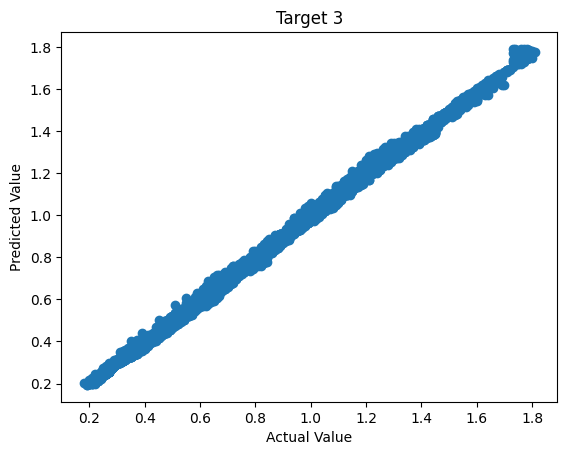

In [ ]:
target_idx = 2
plt.scatter(y_test[:, target_idx], y_pred[:, target_idx])
plt.title(f'Target {target_idx+1}')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

In [11]:
save_data(X_train=X_train, X_val=X_val, y_train=y_train, y_val=y_val)

Data saved successfully!


### NN With 1 Hidden Layer

In [9]:
loaded_vars = load_data(*['models1'])
models1 = loaded_vars['models1']
del loaded_vars
models1

Variable 'models1' has been loaded.


[{'model': <Sequential name=sequential, built=True>,
  'hidden_layers': 1,
  'hidden_layer_neurons': [32],
  'learning_rate': 0.1,
  'regularization_lambda': 0.0001,
  'batch_norm': 'no',
  'training_loss': 0.024923190474510193,
  'val_loss': 0.024340583011507988},
 {'model': <Sequential name=sequential, built=True>,
  'hidden_layers': 1,
  'hidden_layer_neurons': [24],
  'learning_rate': 0.1,
  'regularization_lambda': 0.0001,
  'batch_norm': 'no',
  'training_loss': 0.026134612038731575,
  'val_loss': 0.02599441260099411},
 {'model': <Sequential name=sequential, built=True>,
  'hidden_layers': 1,
  'hidden_layer_neurons': [16],
  'learning_rate': 0.1,
  'regularization_lambda': 0.0001,
  'batch_norm': 'no',
  'training_loss': 0.02659854292869568,
  'val_loss': 0.026300067082047462},
 {'model': <Sequential name=sequential, built=True>,
  'hidden_layers': 1,
  'hidden_layer_neurons': [8],
  'learning_rate': 0.1,
  'regularization_lambda': 0.0001,
  'batch_norm': 'no',
  'training_loss'

### Analyzing Top 10 Models

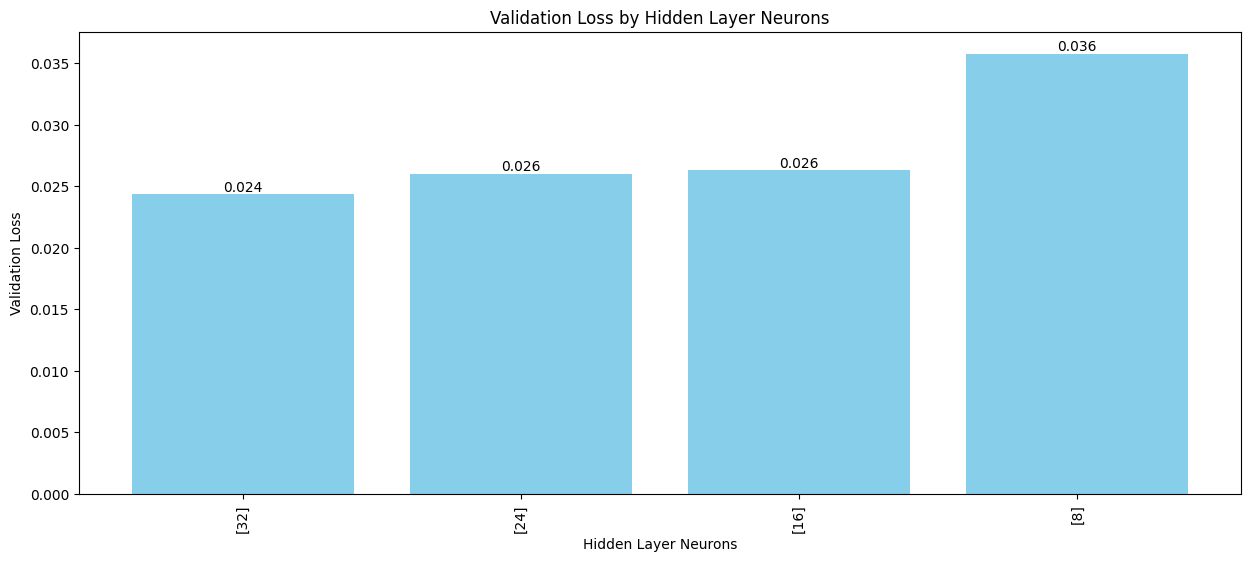

In [12]:
disp_loss(models1, annot_spacing=0.01)

### NN With 2 Hidden Layers

In [10]:
loaded_vars = load_data(*['models2'])
models2 = loaded_vars['models2']
del loaded_vars
models2

Variable 'models2' has been loaded.


[{'model': <Sequential name=sequential, built=True>,
  'hidden_layers': 2,
  'hidden_layer_neurons': [32, 32],
  'learning_rate': 0.1,
  'regularization_lambda': 0.0001,
  'batch_norm': 'no',
  'training_loss': 0.023476772010326385,
  'val_loss': 0.02315884828567505},
 {'model': <Sequential name=sequential, built=True>,
  'hidden_layers': 2,
  'hidden_layer_neurons': [16, 16],
  'learning_rate': 0.1,
  'regularization_lambda': 0.0001,
  'batch_norm': 'no',
  'training_loss': 0.024175157770514488,
  'val_loss': 0.023707523941993713},
 {'model': <Sequential name=sequential, built=True>,
  'hidden_layers': 2,
  'hidden_layer_neurons': [24, 24],
  'learning_rate': 0.1,
  'regularization_lambda': 0.0001,
  'batch_norm': 'no',
  'training_loss': 0.02769758179783821,
  'val_loss': 0.027362894266843796},
 {'model': <Sequential name=sequential, built=True>,
  'hidden_layers': 2,
  'hidden_layer_neurons': [8, 8],
  'learning_rate': 0.1,
  'regularization_lambda': 0.0001,
  'batch_norm': 'no',
  

### Analyzing Top 10 Models

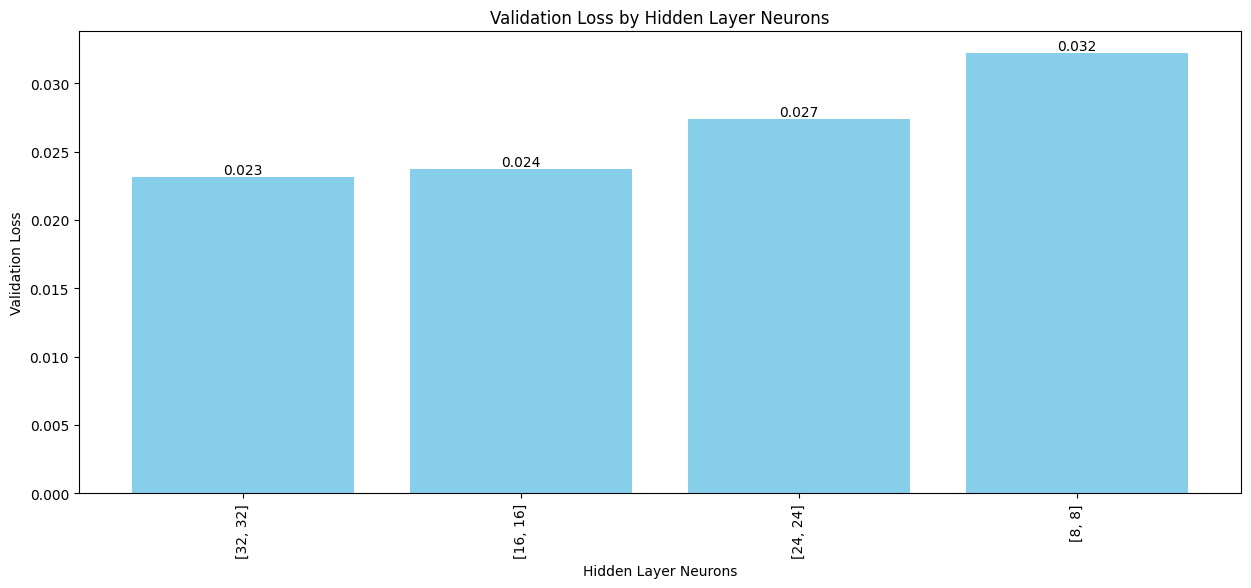

In [14]:
disp_loss(models2, annot_spacing=0.01)

### NN With 3 Hidden Layers

In [11]:
loaded_vars = load_data(*['models3'])
models3 = loaded_vars['models3']
del loaded_vars
models3

Variable 'models3' has been loaded.


[{'model': <Sequential name=sequential, built=True>,
  'hidden_layers': 3,
  'hidden_layer_neurons': [24, 24, 24],
  'learning_rate': 0.01,
  'regularization_lambda': 0.0001,
  'batch_norm': 'no',
  'training_loss': 0.023942898958921432,
  'val_loss': 0.023620082065463066},
 {'model': <Sequential name=sequential, built=True>,
  'hidden_layers': 3,
  'hidden_layer_neurons': [32, 32, 32],
  'learning_rate': 0.01,
  'regularization_lambda': 0.0001,
  'batch_norm': 'no',
  'training_loss': 0.024591319262981415,
  'val_loss': 0.02398810349404812},
 {'model': <Sequential name=sequential, built=True>,
  'hidden_layers': 3,
  'hidden_layer_neurons': [16, 16, 16],
  'learning_rate': 0.1,
  'regularization_lambda': 0.0001,
  'batch_norm': 'no',
  'training_loss': 0.026445405557751656,
  'val_loss': 0.025778580456972122},
 {'model': <Sequential name=sequential, built=True>,
  'hidden_layers': 3,
  'hidden_layer_neurons': [8, 8, 8],
  'learning_rate': 0.1,
  'regularization_lambda': 0.0001,
  'bat

### Analyzing Top 10 Models

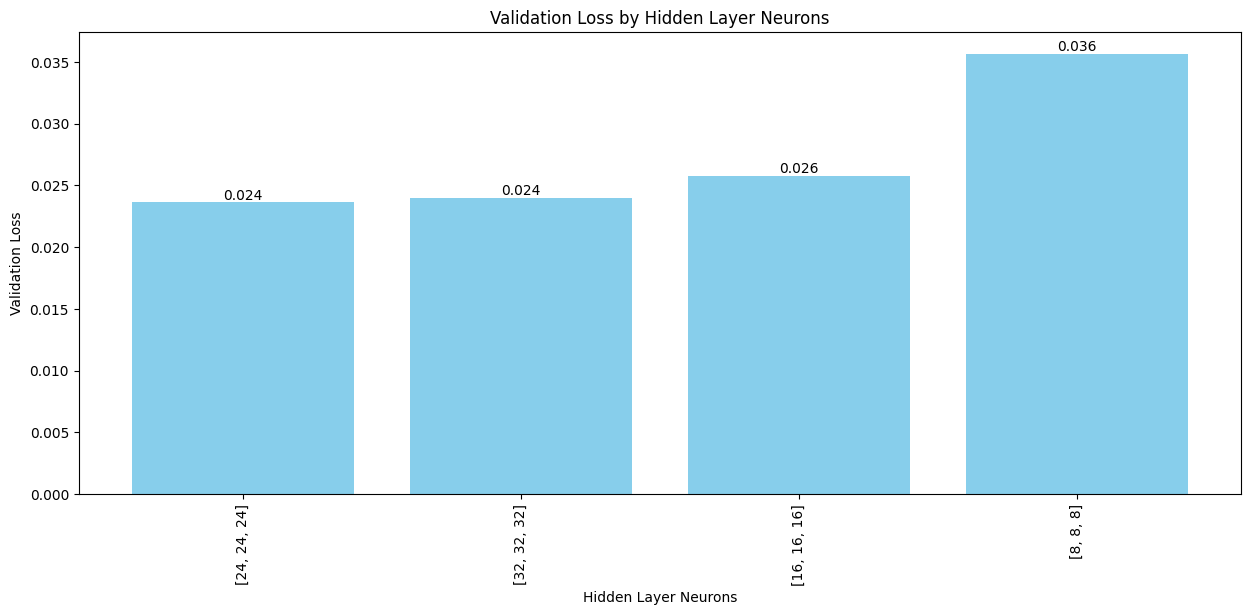

In [16]:
disp_loss(models3, annot_spacing=0.01)

In [12]:
models_combined = models1 + models2 + models3
models_combined = sorted(models_combined, key=lambda x: x['val_loss'])

In [13]:
models_combined

[{'model': <Sequential name=sequential, built=True>,
  'hidden_layers': 2,
  'hidden_layer_neurons': [32, 32],
  'learning_rate': 0.1,
  'regularization_lambda': 0.0001,
  'batch_norm': 'no',
  'training_loss': 0.023476772010326385,
  'val_loss': 0.02315884828567505},
 {'model': <Sequential name=sequential, built=True>,
  'hidden_layers': 3,
  'hidden_layer_neurons': [24, 24, 24],
  'learning_rate': 0.01,
  'regularization_lambda': 0.0001,
  'batch_norm': 'no',
  'training_loss': 0.023942898958921432,
  'val_loss': 0.023620082065463066},
 {'model': <Sequential name=sequential, built=True>,
  'hidden_layers': 2,
  'hidden_layer_neurons': [16, 16],
  'learning_rate': 0.1,
  'regularization_lambda': 0.0001,
  'batch_norm': 'no',
  'training_loss': 0.024175157770514488,
  'val_loss': 0.023707523941993713},
 {'model': <Sequential name=sequential, built=True>,
  'hidden_layers': 3,
  'hidden_layer_neurons': [32, 32, 32],
  'learning_rate': 0.01,
  'regularization_lambda': 0.0001,
  'batch_no

### Analyzing Top 10 Combined Models

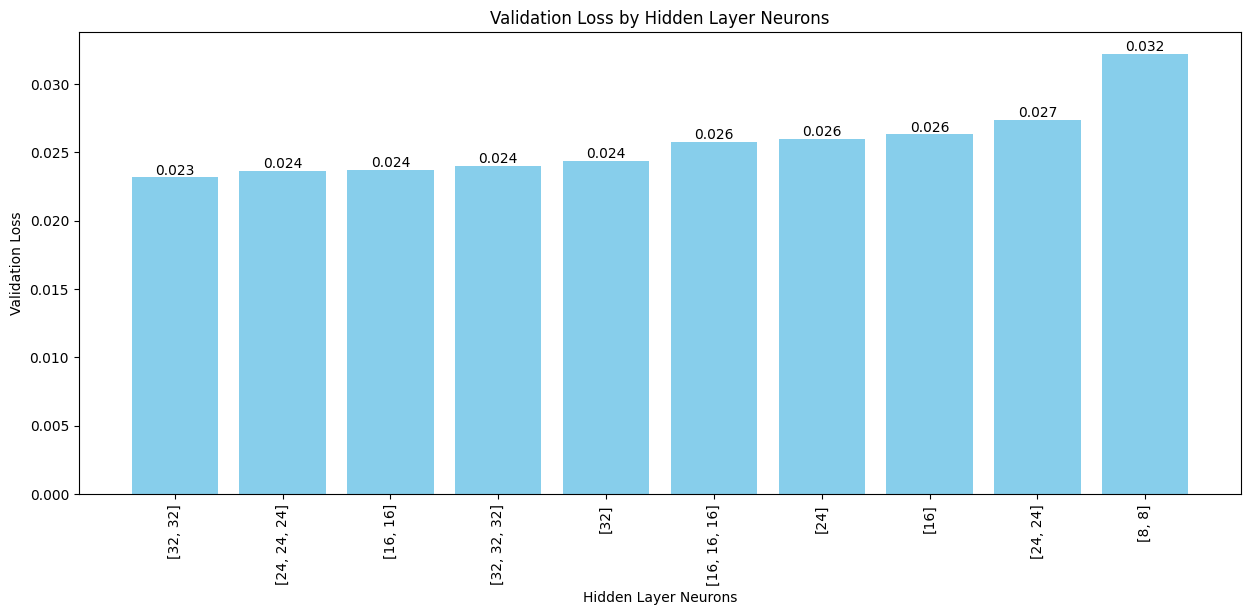

In [19]:
disp_loss(models_combined, annot_spacing=0.01)

### Analyzing Relative Loss of Top 10 Combined Models

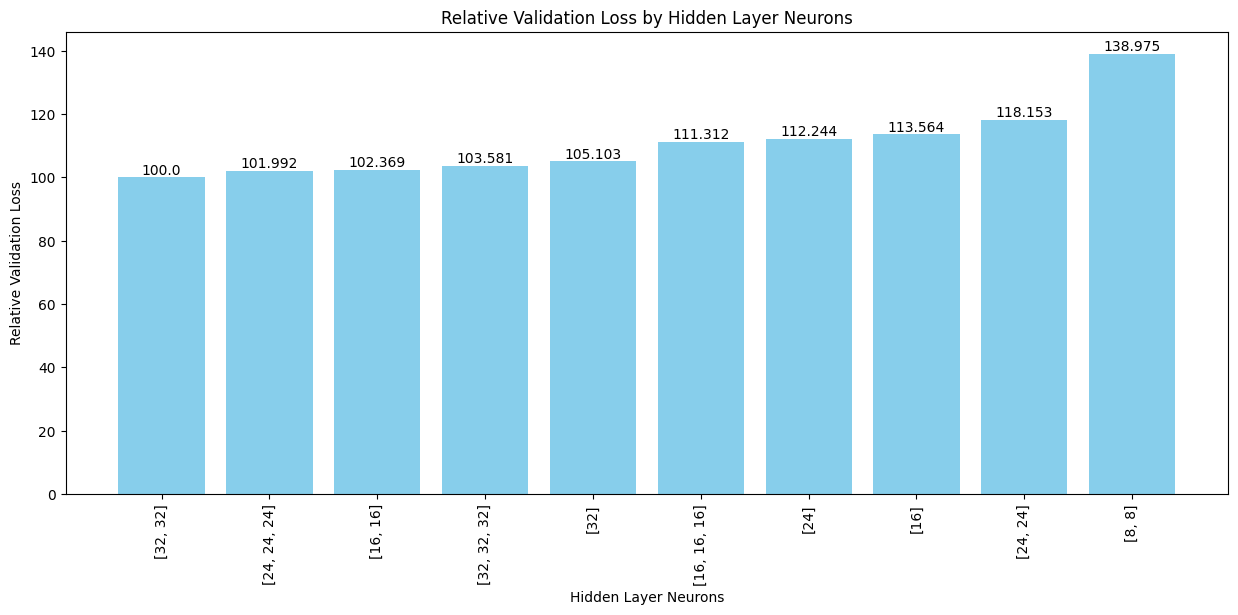

In [20]:
disp_rel_loss(models_combined, annot_spacing=0.01)

### Let's rebuild the top 5 models with 100 epochs

In [3]:
loaded_vars = load_data(*['models1_2', 'models1_3', 'models1_4', 'models2_2', 'models3_2'])
short_listed_models = loaded_vars['models1_2'] + loaded_vars['models1_3'] + loaded_vars['models1_4'] + loaded_vars['models2_2'] + loaded_vars['models3_2']
del loaded_vars
short_listed_models = sorted(short_listed_models, key=lambda x: -x['val_loss'])

Variable 'models1_2' has been loaded.
Variable 'models1_3' has been loaded.
Variable 'models1_4' has been loaded.
Variable 'models2_2' has been loaded.
Variable 'models3_2' has been loaded.


In [4]:
short_listed_models

[{'model': <Sequential name=sequential, built=True>,
  'hidden_layers': 1,
  'hidden_layer_neurons': [8],
  'learning_rate': 0.1,
  'regularization_lambda': 0.0001,
  'batch_norm': 'no',
  'training_loss': 0.03562110289931297,
  'val_loss': 0.03490450605750084,
  'epochs': 100},
 {'model': <Sequential name=sequential, built=True>,
  'hidden_layers': 1,
  'hidden_layer_neurons': [16],
  'learning_rate': 0.1,
  'regularization_lambda': 0.0,
  'batch_norm': 'no',
  'training_loss': 0.022496717050671577,
  'val_loss': 0.022013846784830093,
  'epochs': 100},
 {'model': <Sequential name=sequential, built=True>,
  'hidden_layers': 2,
  'hidden_layer_neurons': [16, 16],
  'learning_rate': 0.1,
  'regularization_lambda': 0.0001,
  'batch_norm': 'no',
  'training_loss': 0.02214219607412815,
  'val_loss': 0.021638698875904083},
 {'model': <Sequential name=sequential, built=True>,
  'hidden_layers': 1,
  'hidden_layer_neurons': [24],
  'learning_rate': 0.1,
  'regularization_lambda': 0.0,
  'batch

### Analyzing Short Listed Models

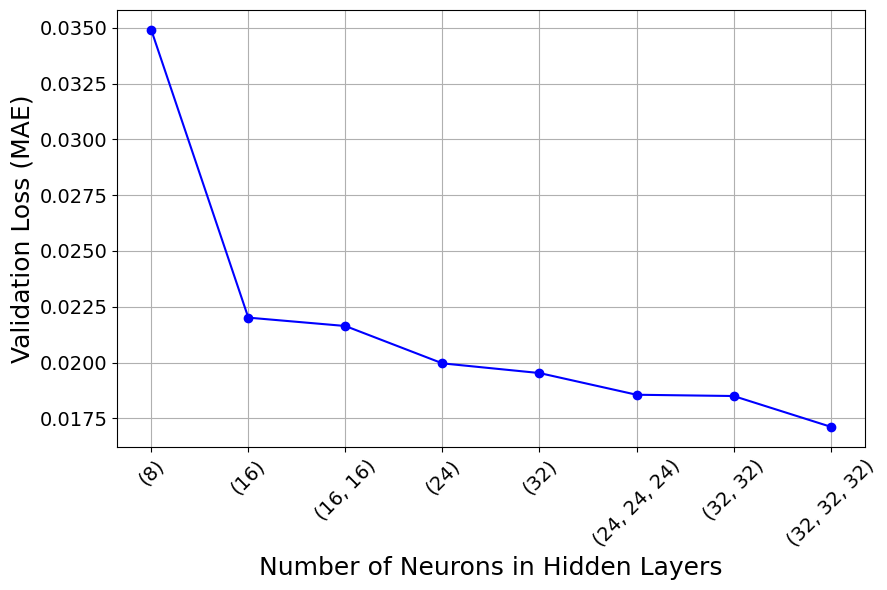

In [16]:
final_val_loss = map(lambda x: x['val_loss'], short_listed_models)
final_val_loss = list(final_val_loss)
final_val_loss_neurons = map(lambda x: x['hidden_layer_neurons'], short_listed_models)
final_val_loss_neurons = [
    f"({', '.join(map(str, sublist))})" for sublist in final_val_loss_neurons
]
x = [i for i in range(len(final_val_loss))]
plt.figure(figsize=(9, 6))
bars = plt.plot(x, final_val_loss, marker='o', linestyle='-', color='b')
plt.xticks(x, final_val_loss_neurons, rotation=45, fontsize=14)
plt.yticks(fontsize=14)
# plt.title('Validation Loss by Hidden Layer Neurons')
plt.xlabel('Number of Neurons in Hidden Layers', fontsize=18)
plt.ylabel('Validation Loss (MAE)', fontsize=18)
plt.grid()
plt.tight_layout()
plt.savefig('final pictures/val_loss.png', dpi=300)
plt.show()

### Analyzing Relative Loss of Top 10 Short Listed Models

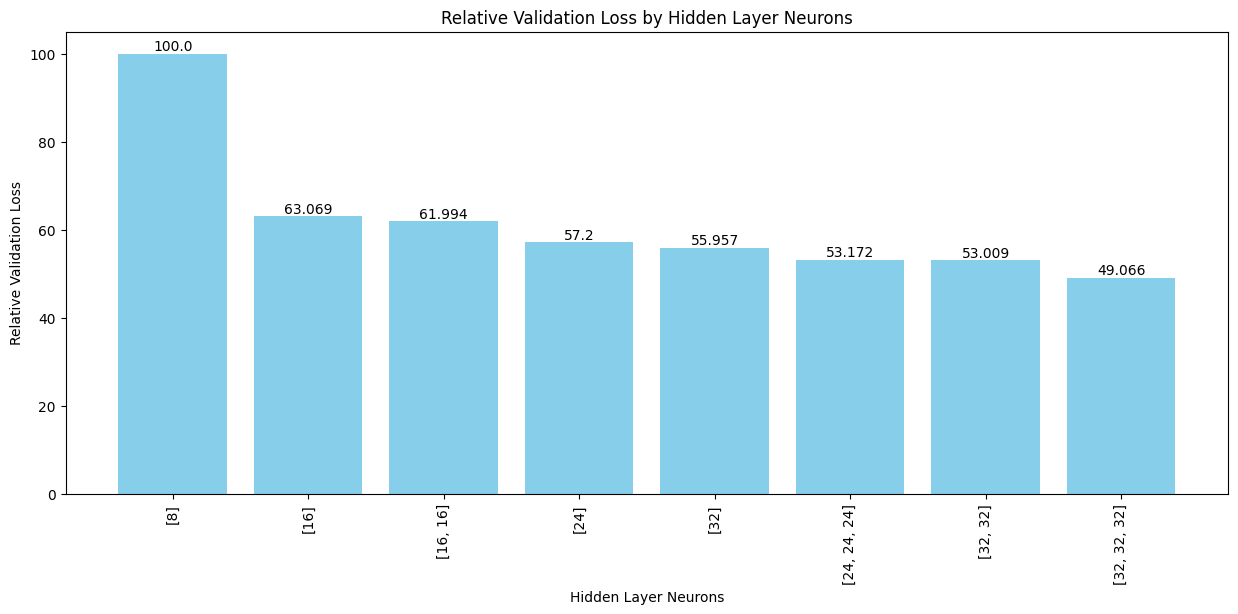

In [28]:
disp_rel_loss(short_listed_models, annot_spacing=0.01)

In [79]:
model_1_16 = short_listed_models[1]['model']
y_pred = model_1_16.predict(X_test, verbose=0)

In [89]:
# Calculate MAE manually
mae = np.mean(np.abs(y_test[:,0] - y_pred[:,0]))

# Calculate MAPE manually, avoiding division by zero
mape = np.mean(np.abs((y_test[:,0] - y_pred[:,0]) / np.clip(y_test[:,0], 1e-10, None))) * 100
print('HPBW')
print(f"MAE: {mae}")
print(f"MAPE: {mape}%")

HPBW
MAE: 0.005355639656534373
MAPE: 0.7023348961461738%


In [87]:
# Calculate MAE manually
mae = np.mean(np.abs(y_test[:,1] - y_pred[:,1]))

# Calculate MAPE manually, avoiding division by zero
mape = np.mean(np.abs((y_test[:,1] - y_pred[:,1]) / np.clip(y_test[:,1], 1e-10, None))) * 100
print('SLA')
print(f"MAE: {mae}")
print(f"MAPE: {mape}%")

SLA
MAE: 0.04170610751347381
MAPE: 0.20044428531940212%


In [88]:
# Calculate MAE manually
mae = np.mean(np.abs(y_test[:,2] - y_pred[:,2]))

# Calculate MAPE manually, avoiding division by zero
mape = np.mean(np.abs((y_test[:,2] - y_pred[:,2]) / np.clip(y_test[:,2], 1e-10, None))) * 100
print('Delta')
print(f"MAE: {mae}")
print(f"MAPE: {mape}%")

Delta
MAE: 0.005046618000970273
MAPE: 0.8309731147590025%


In [9]:
tick_size = 24
label_size = 26

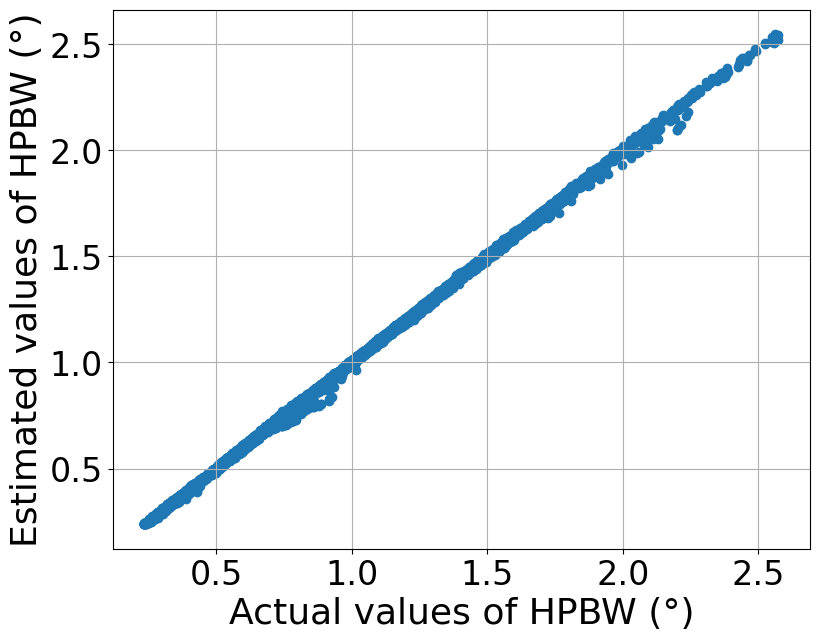

In [ ]:
# HPBW
plt.figure(figsize=(9, 7))

# Plotting the data with markers
plt.scatter(y_test[:, 0], y_pred[:, 0])

# Adding title and labels with large font sizes
# plt.title('Validation Loss vs. Polynomial Degree', fontsize=20)
plt.xlabel('Actual values of HPBW (°)', fontsize=label_size)
plt.ylabel('Estimated values of HPBW (°)', fontsize=label_size)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)

# Adding grid for better readability
plt.grid(True)
# plt.tight_layout()
plt.savefig('final pictures/scatter_hpbw.png', dpi=300)
# Display the plot
plt.show()

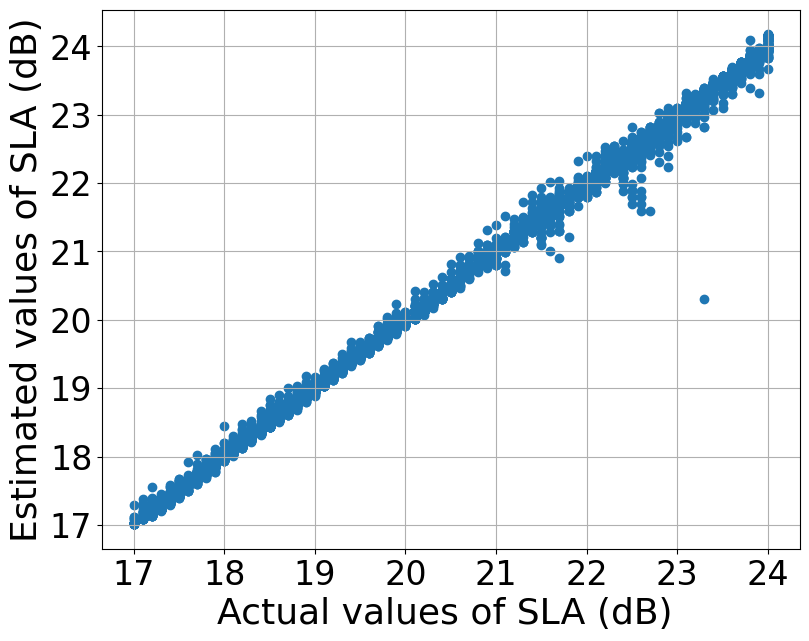

In [ ]:
# SLA
plt.figure(figsize=(9, 7))

# Plotting the data with markers
plt.scatter(y_test[:, 1], y_pred[:, 1])

# Adding title and labels with large font sizes
# plt.title('Validation Loss vs. Polynomial Degree', fontsize=20)
plt.xlabel('Actual values of SLA (dB) ', fontsize=label_size)
plt.ylabel('Estimated values of SLA (dB)', fontsize=label_size)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)

# Adding grid for better readability
plt.grid(True)
plt.savefig('final pictures/scatter_sla.png', dpi=300)
# Display the plot
plt.show()

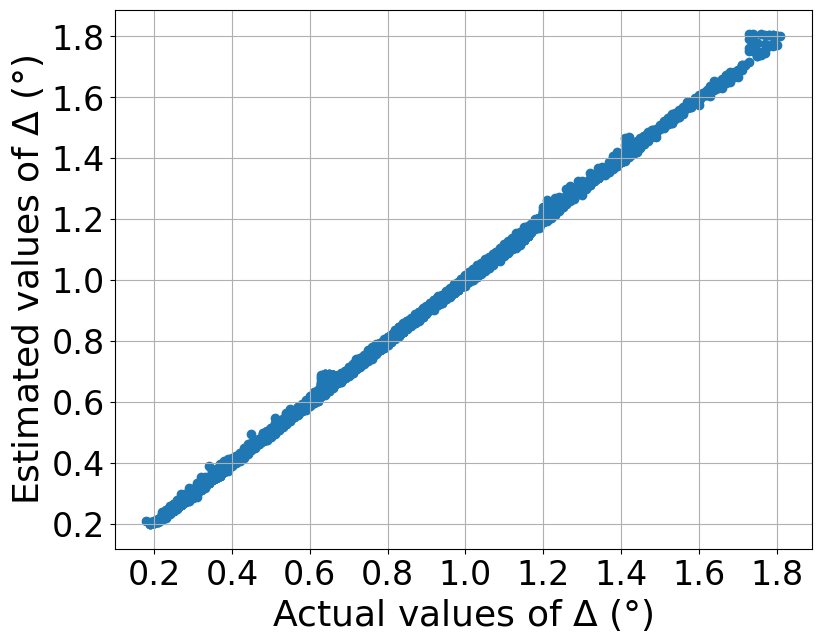

In [12]:
# delta
plt.figure(figsize=(9, 7))

# Plotting the data with markers
plt.scatter(y_test[:, 2], y_pred[:, 2])

# Adding title and labels with large font sizes
# plt.title('Validation Loss vs. Polynomial Degree', fontsize=20)
plt.xlabel(r'Actual values of $\Delta$ (°)', fontsize=label_size)
plt.ylabel(r'Estimated values of $\Delta$ (°)', fontsize=label_size)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)

# Adding grid for better readability
plt.grid(True)
# plt.tight_layout()
plt.savefig('final pictures/32-32-32-scatter_delta.png', dpi=300)
# Display the plot
plt.show()

In [19]:
save_data(short_listed_models=short_listed_models)

Data saved successfully!


# Error Plots For Test Set

In [50]:
ae = np.abs(y_test - y_pred)
ape = (ae/y_test) * 100

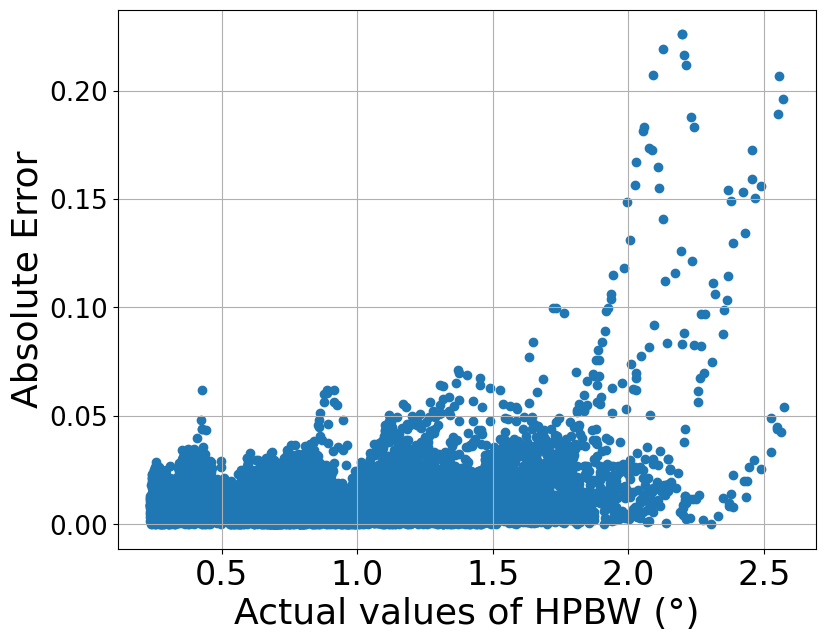

In [51]:
# HPBW AE
plt.figure(figsize=(9, 7))

# Plotting the data with markers
plt.scatter(y_test[:, 0], ae[:, 0])

# Adding title and labels with large font sizes
# plt.title('Validation Loss vs. Polynomial Degree', fontsize=20)
plt.xlabel('Actual values of HPBW (°)', fontsize=label_size)
plt.ylabel('Absolute Error', fontsize=label_size)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size-5)

# Adding grid for better readability
plt.grid(True)
# plt.tight_layout()
plt.savefig('final pictures/scatter_ae_hpbw.png', dpi=300)
# Display the plot
plt.show()

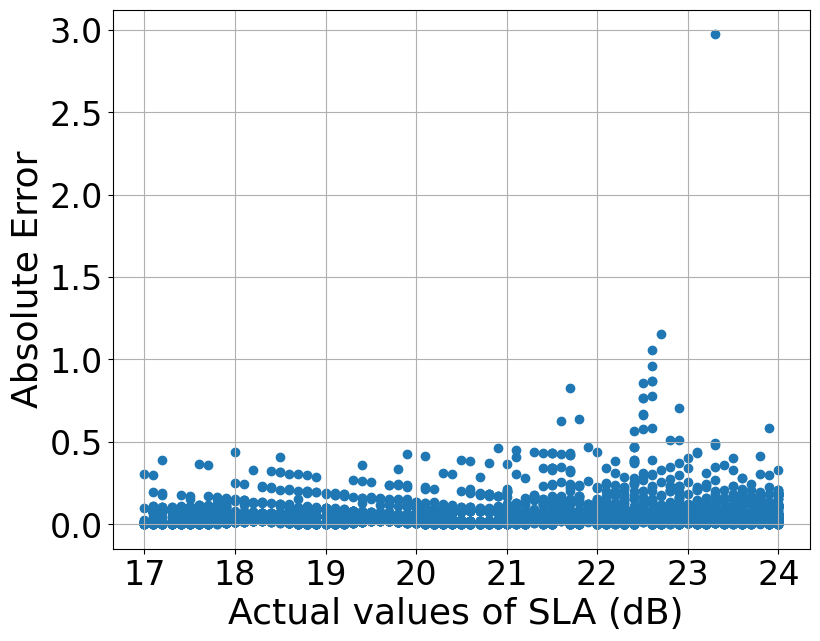

In [52]:
# SLA AE
plt.figure(figsize=(9, 7))

# Plotting the data with markers
plt.scatter(y_test[:, 1], ae[:, 1])

# Adding title and labels with large font sizes
# plt.title('Validation Loss vs. Polynomial Degree', fontsize=20)
plt.xlabel('Actual values of SLA (dB) ', fontsize=label_size)
plt.ylabel('Absolute Error', fontsize=label_size)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)

# Adding grid for better readability
plt.grid(True)
plt.savefig('final pictures/scatter_ae_sla.png', dpi=300)
# Display the plot
plt.show()

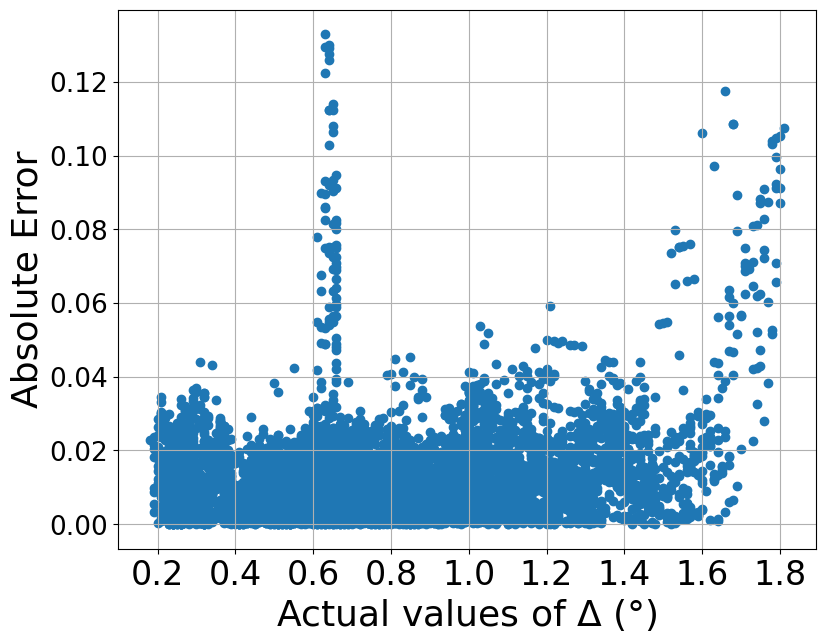

In [53]:
# delta AE
plt.figure(figsize=(9, 7))

# Plotting the data with markers
plt.scatter(y_test[:, 2], ae[:, 2])

# Adding title and labels with large font sizes
# plt.title('Validation Loss vs. Polynomial Degree', fontsize=20)
plt.xlabel(r'Actual values of $\Delta$ (°)', fontsize=label_size)
plt.ylabel("Absolute Error", fontsize=label_size)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size-5)

# Adding grid for better readability
plt.grid(True)
# plt.tight_layout()
plt.savefig('final pictures/scatter_ae_delta.png', dpi=300)
# Display the plot
plt.show()

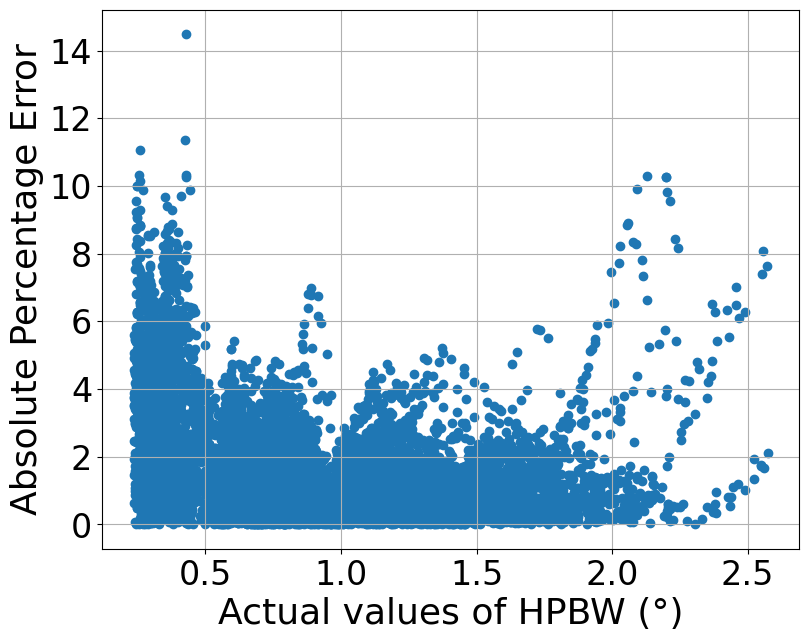

In [54]:
# HPBW APE
plt.figure(figsize=(9, 7))

# Plotting the data with markers
plt.scatter(y_test[:, 0], ape[:, 0])

# Adding title and labels with large font sizes
# plt.title('Validation Loss vs. Polynomial Degree', fontsize=20)
plt.xlabel('Actual values of HPBW (°)', fontsize=label_size)
plt.ylabel(r'Absolute Percentage Error', fontsize=label_size)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)

# Adding grid for better readability
plt.grid(True)
# plt.tight_layout()
plt.savefig('final pictures/scatter_ape_hpbw.png', dpi=300)
# Display the plot
plt.show()

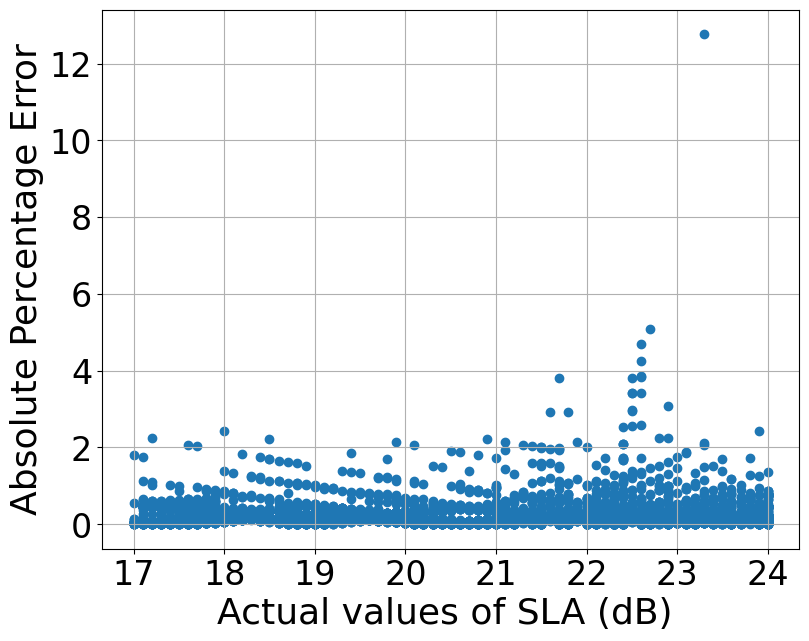

In [55]:
# SLA APE
plt.figure(figsize=(9, 7))

# Plotting the data with markers
plt.scatter(y_test[:, 1], ape[:, 1])

# Adding title and labels with large font sizes
# plt.title('Validation Loss vs. Polynomial Degree', fontsize=20)
plt.xlabel('Actual values of SLA (dB) ', fontsize=label_size)
plt.ylabel('Absolute Percentage Error', fontsize=label_size)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)

# Adding grid for better readability
plt.grid(True)
plt.savefig('final pictures/scatter_ape_sla.png', dpi=300)
# Display the plot
plt.show()

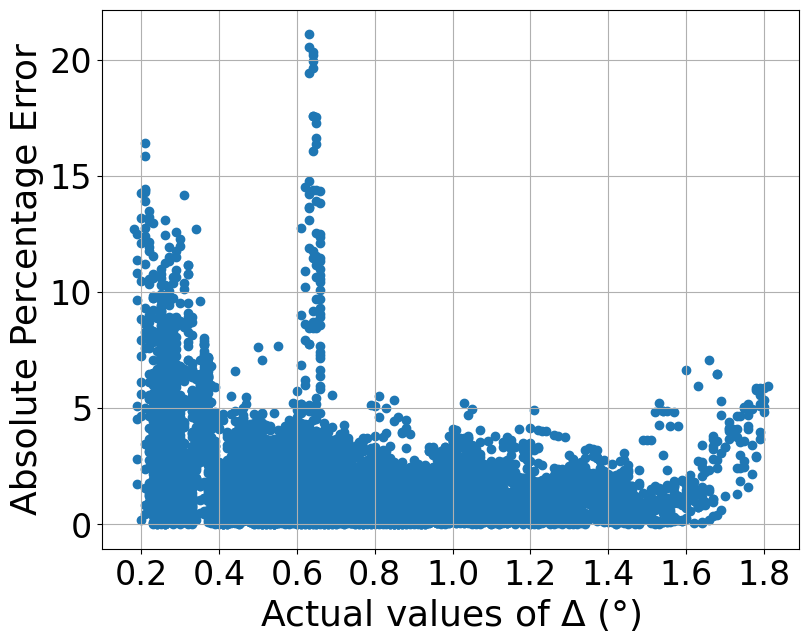

In [56]:
# delta APE
plt.figure(figsize=(9, 7))

# Plotting the data with markers
plt.scatter(y_test[:, 2], ape[:, 2])

# Adding title and labels with large font sizes
# plt.title('Validation Loss vs. Polynomial Degree', fontsize=20)
plt.xlabel(r'Actual values of $\Delta$ (°)', fontsize=label_size)
plt.ylabel("Absolute Percentage Error", fontsize=label_size)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)

# Adding grid for better readability
plt.grid(True)
# plt.tight_layout()
plt.savefig('final pictures/scatter_ape_delta.png', dpi=300)
# Display the plot
plt.show()

# Error Plots For Best Model

In [7]:
model_best = short_listed_models[-1]['model']
y_pred = model_best.predict(X_test, verbose=0)

# Error Plots For Test Set

In [71]:
ae = np.abs(y_test - y_pred)
ape = (ae/y_test) * 100

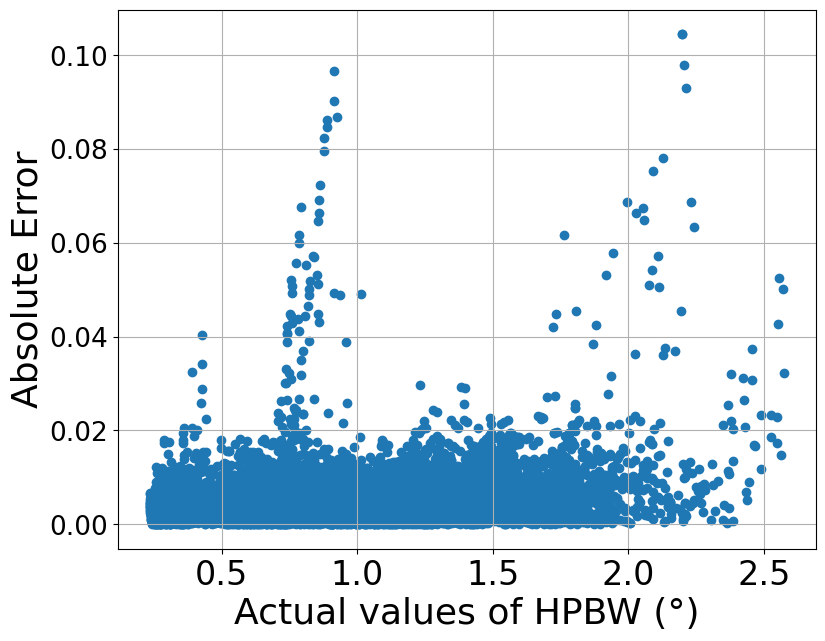

In [72]:
# HPBW AE
plt.figure(figsize=(9, 7))

# Plotting the data with markers
plt.scatter(y_test[:, 0], ae[:, 0])

# Adding title and labels with large font sizes
# plt.title('Validation Loss vs. Polynomial Degree', fontsize=20)
plt.xlabel('Actual values of HPBW (°)', fontsize=label_size)
plt.ylabel('Absolute Error', fontsize=label_size)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size-5)

# Adding grid for better readability
plt.grid(True)
# plt.tight_layout()
plt.savefig('final pictures/32-32-32-scatter_ae_hpbw.png', dpi=300)
# Display the plot
plt.show()

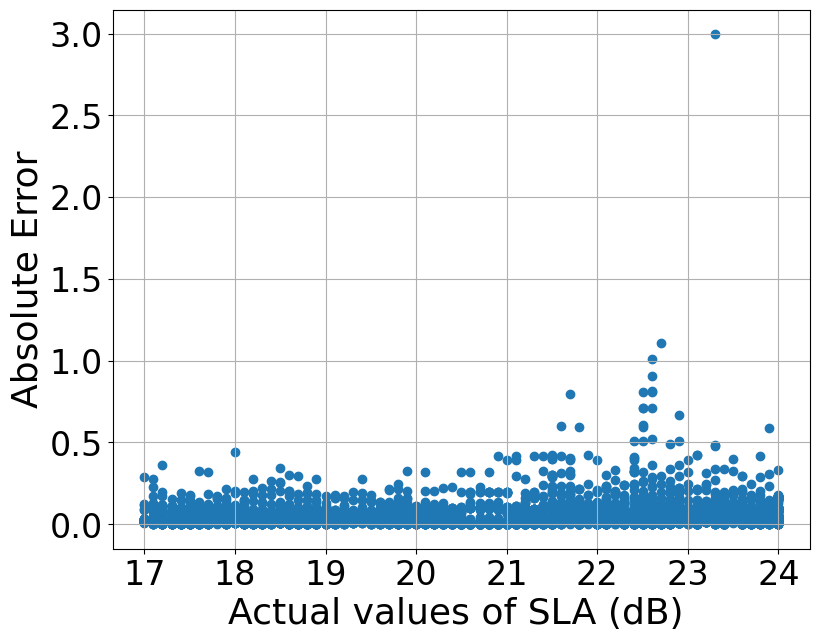

In [73]:
# SLA AE
plt.figure(figsize=(9, 7))

# Plotting the data with markers
plt.scatter(y_test[:, 1], ae[:, 1])

# Adding title and labels with large font sizes
# plt.title('Validation Loss vs. Polynomial Degree', fontsize=20)
plt.xlabel('Actual values of SLA (dB) ', fontsize=label_size)
plt.ylabel('Absolute Error', fontsize=label_size)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)

# Adding grid for better readability
plt.grid(True)
plt.savefig('final pictures/32-32-32-scatter_ae_sla.png', dpi=300)
# Display the plot
plt.show()

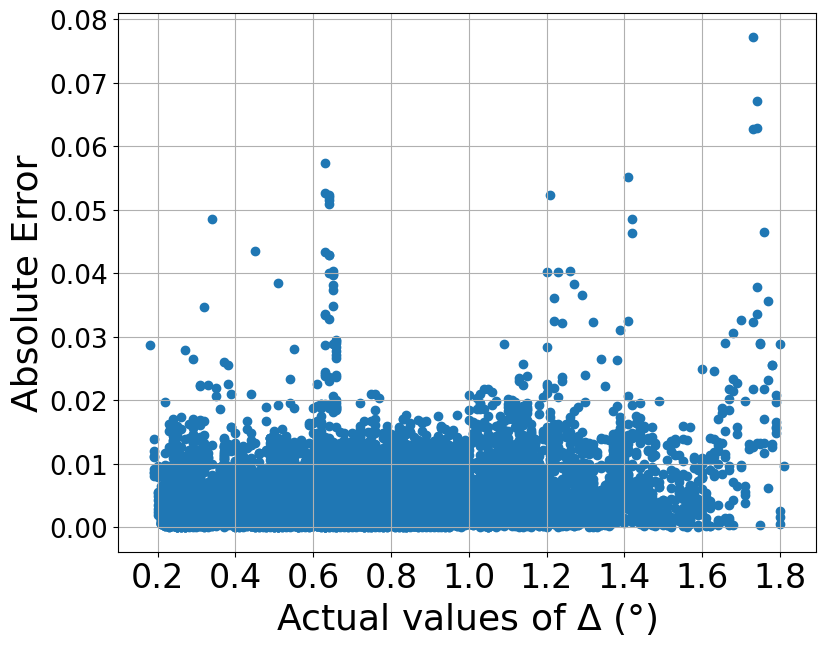

In [74]:
# delta AE
plt.figure(figsize=(9, 7))

# Plotting the data with markers
plt.scatter(y_test[:, 2], ae[:, 2])

# Adding title and labels with large font sizes
# plt.title('Validation Loss vs. Polynomial Degree', fontsize=20)
plt.xlabel(r'Actual values of $\Delta$ (°)', fontsize=label_size)
plt.ylabel("Absolute Error", fontsize=label_size)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size-5)

# Adding grid for better readability
plt.grid(True)
# plt.tight_layout()
plt.savefig('final pictures/32-32-32-scatter_ae_delta.png', dpi=300)
# Display the plot
plt.show()

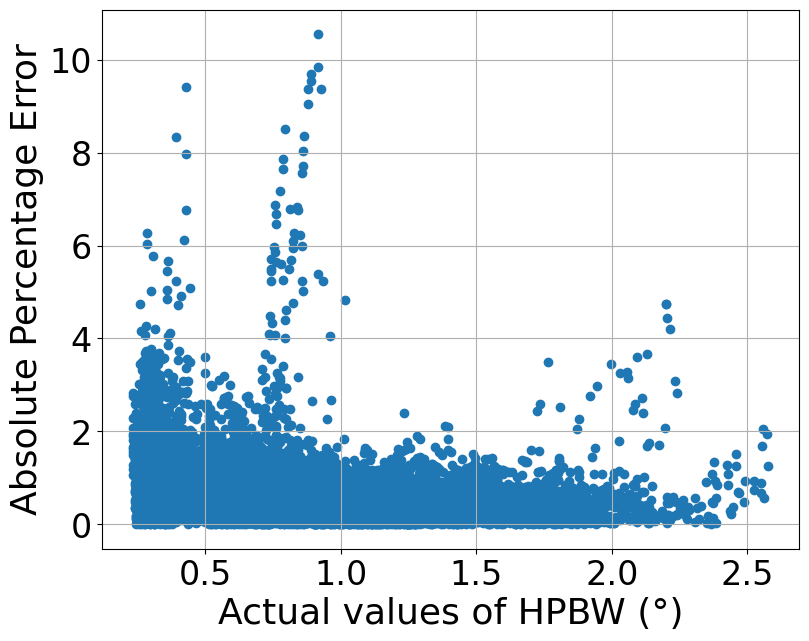

In [64]:
# HPBW APE
plt.figure(figsize=(9, 7))

# Plotting the data with markers
plt.scatter(y_test[:, 0], ape[:, 0])

# Adding title and labels with large font sizes
# plt.title('Validation Loss vs. Polynomial Degree', fontsize=20)
plt.xlabel('Actual values of HPBW (°)', fontsize=label_size)
plt.ylabel(r'Absolute Percentage Error', fontsize=label_size)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)

# Adding grid for better readability
plt.grid(True)
# plt.tight_layout()
# plt.savefig('final pictures/scatter_ape_hpbw.png', dpi=300)
# Display the plot
plt.show()

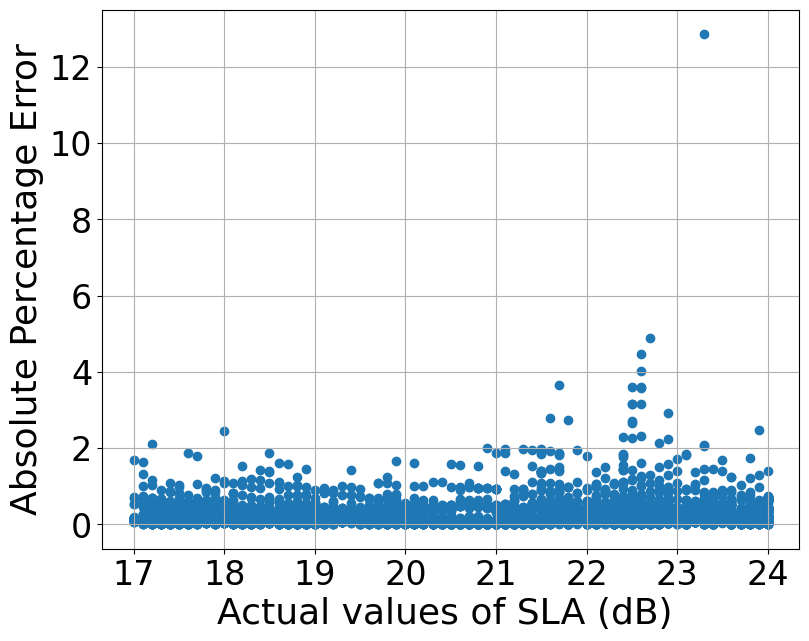

In [65]:
# SLA APE
plt.figure(figsize=(9, 7))

# Plotting the data with markers
plt.scatter(y_test[:, 1], ape[:, 1])

# Adding title and labels with large font sizes
# plt.title('Validation Loss vs. Polynomial Degree', fontsize=20)
plt.xlabel('Actual values of SLA (dB) ', fontsize=label_size)
plt.ylabel('Absolute Percentage Error', fontsize=label_size)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)

# Adding grid for better readability
plt.grid(True)
# plt.savefig('final pictures/scatter_ape_sla.png', dpi=300)
# Display the plot
plt.show()

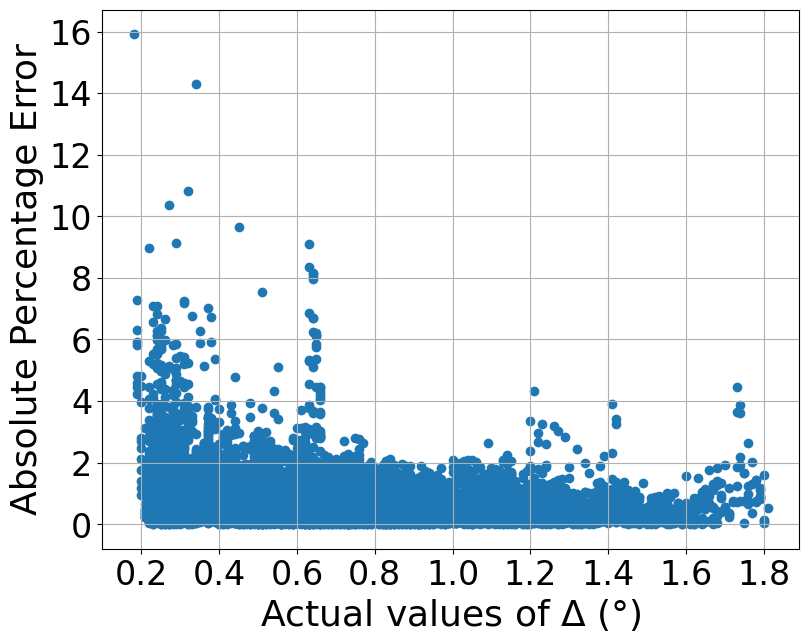

In [66]:
# delta APE
plt.figure(figsize=(9, 7))

# Plotting the data with markers
plt.scatter(y_test[:, 2], ape[:, 2])

# Adding title and labels with large font sizes
# plt.title('Validation Loss vs. Polynomial Degree', fontsize=20)
plt.xlabel(r'Actual values of $\Delta$ (°)', fontsize=label_size)
plt.ylabel("Absolute Percentage Error", fontsize=label_size)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)

# Adding grid for better readability
plt.grid(True)
# plt.tight_layout()
# plt.savefig('final pictures/scatter_ape_delta.png', dpi=300)
# Display the plot
plt.show()